In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from io import StringIO


# # Load the CSV file into a DataFrame and reset the index
# df = pd.read_csv('finaldata.csv', dtype=str)  # Read all data as string to prevent unwanted type inference
# df.reset_index(drop=True, inplace=True)

# def parse_dates(date_str):
#     try:
#         # Assume date_str is a string and try to parse it as a date
#         return pd.to_datetime(date_str.strip(), format='%b %d, %Y', errors='coerce')
#     except Exception as e:
#         # Output the error and return pd.NaT
#         print(f"Error parsing {date_str}: {e}")
#         return pd.NaT

# # Apply the custom parse_dates function to each entry in the 'Date' column
# df['Date'] = df['Date'].apply(parse_dates)

# # Convert 'Rating' to numeric, coercing errors
# df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# # Fill NaN in 'Location' with "Unknown"
# df['Location'].fillna("Unknown", inplace=True)

# # Display the first 20 rows to inspect
# df.head(20)

# df.head(20)

[2023 2018 2015 2022 2021 2016 2020 2017 2014 2010 2019 2013 2009 2008
 2012 2011]


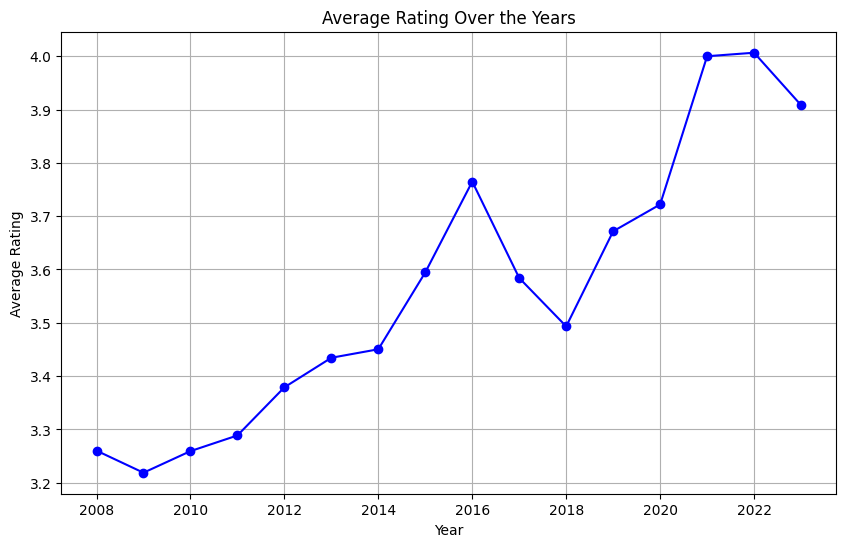

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO


df = pd.read_csv('rawdata.csv', dtype=str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.fillna(value={"Location": "Unknown"}, inplace=True)
df['Year'] = df['Date'].dt.year
print(df['Year'].unique())
average_ratings_per_year = df.groupby('Year')['Rating'].mean()


average_ratings_per_year.plot(kind='line', marker='o', color='b', figsize=(10, 6))
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

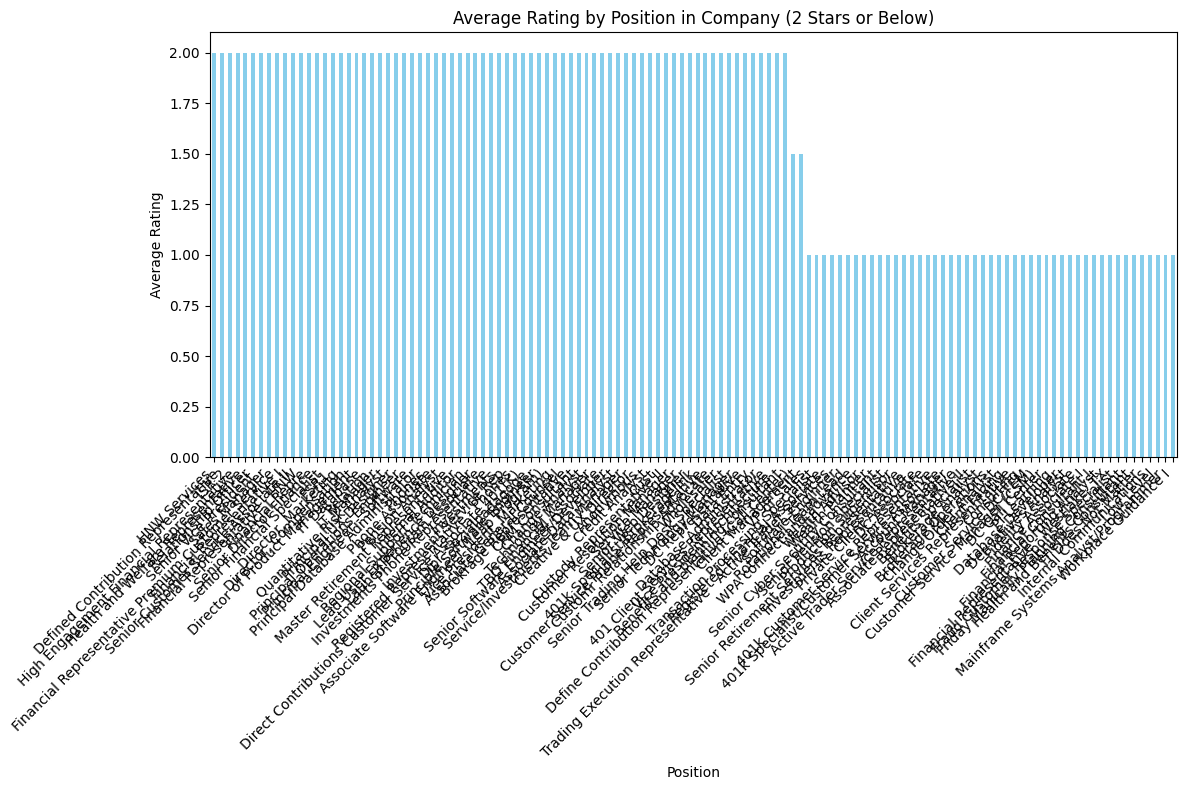

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating greater than 2
average_ratings_below_two = average_ratings_by_position[average_ratings_by_position <= 2].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 2 or below
plt.figure(figsize=(12, 8))
average_ratings_below_two.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (2 Stars or Below)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


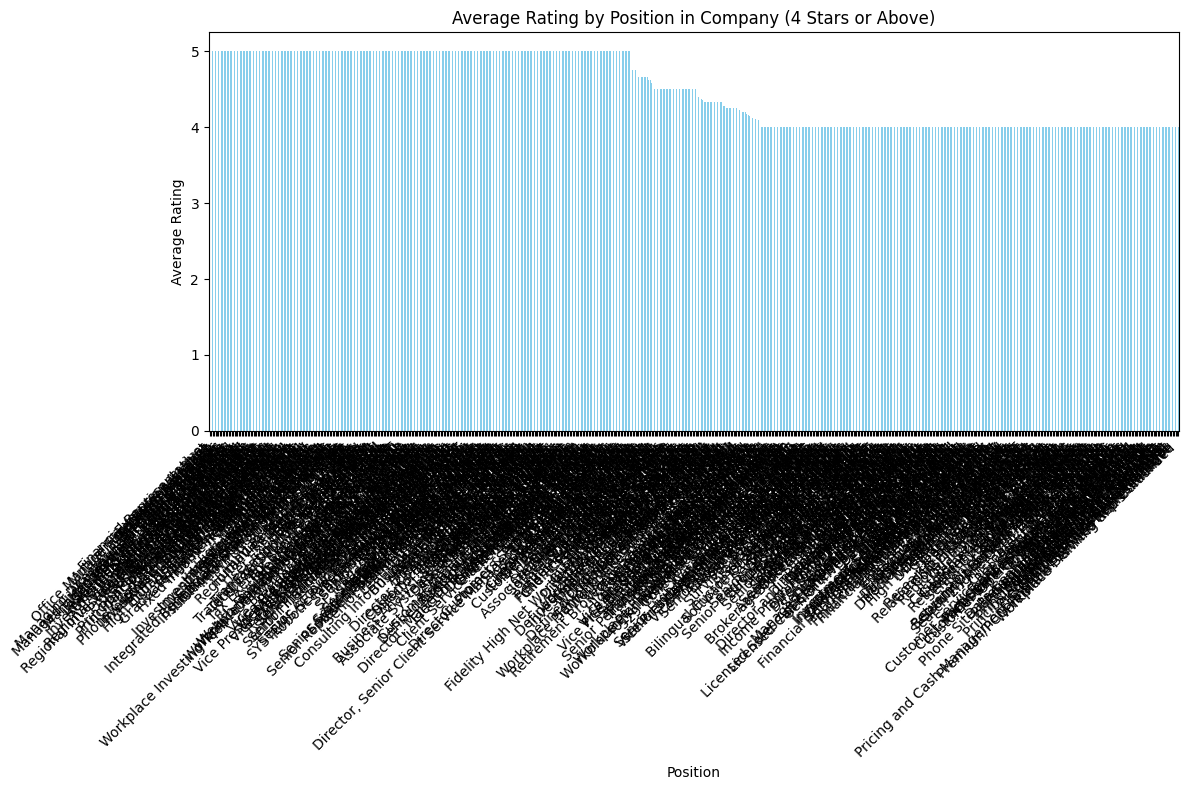

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating less than 4
average_ratings_four_or_above = average_ratings_by_position[average_ratings_by_position >= 4].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 4 or above
plt.figure(figsize=(12, 8))
average_ratings_four_or_above.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (4 Stars or Above)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


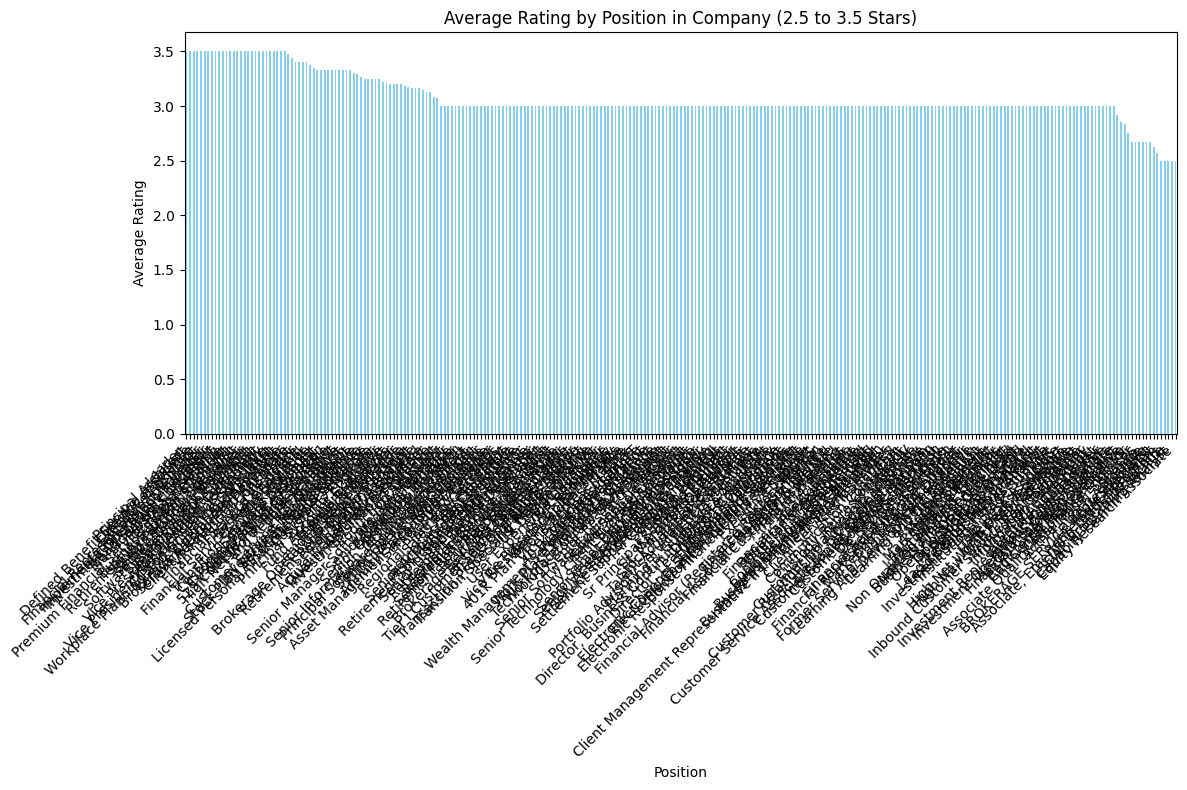

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating between 2.5 and 3.5
average_ratings_between = average_ratings_by_position[(average_ratings_by_position >= 2.5) & (average_ratings_by_position <= 3.5)].sort_values(ascending=False)

# Plotting the average ratings by position for ratings between 2.5 and 3.5
plt.figure(figsize=(12, 8))
average_ratings_between.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (2.5 to 3.5 Stars)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


Position
 Financial Representative                       5.0
SYSTEMS SERVICES and SUPPORT ANALYST            5.0
Retirement Brokerage Representative             5.0
Director, Project & Program Management          5.0
Director, Martech & Marketing Transformation    5.0
Retirement Coordinator                          5.0
Retirement Counselor - Sales                    5.0
Director, Leadership Development                5.0
Robotic Process Automation Developer            5.0
Director, Communications Consultant             5.0
Name: Rating, dtype: float64


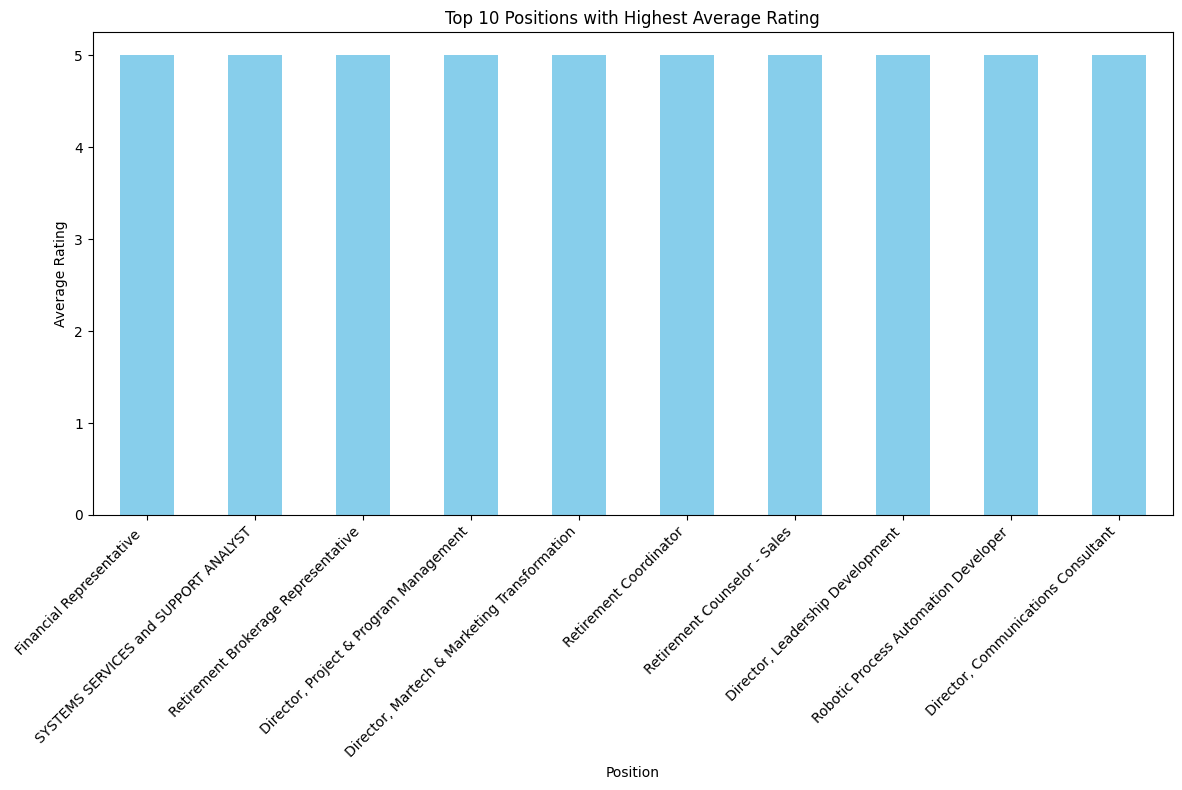

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()


top_positions = average_ratings_by_position.round(10).sort_values(ascending=False).head(10)
print(top_positions)


plt.figure(figsize=(12, 8))
top_positions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Positions with Highest Average Rating')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


In [7]:
def categorize_position(position):
    position_lower = str(position).lower()
    # Strategic and advisory roles
    if 'strategist' in position_lower or 'planner' in position_lower:
        return 'Strategic/Planning Roles'
    elif 'consultant' in position_lower or 'advisor' in position_lower:
        return 'Consultant/Advisor'
    elif 'project' in position_lower or 'program' in position_lower:
        return 'Project/Program Management'

    # Administrative and support roles
    elif any(keyword in position_lower for keyword in ['admin', 'assistant', 'secretary', 'clerk', 'coordinator']):
        return 'Administrative Roles'
    elif 'associate' in position_lower:
        return 'Associate'
    elif 'specialist' in position_lower:
        return 'Specialist'

    # Technology and data roles
    elif any(keyword in position_lower for keyword in ['analyst', 'programmer', 'developer', 'modeler']):
        return 'Analysts and Developers'
    elif 'engineer' in position_lower or 'technologist' in position_lower:
        return 'Engineers/Technologists'
    elif 'it' in position_lower or 'technology' in position_lower:
        return 'IT/Technology'
    elif 'software' in position_lower or 'data' in position_lower:
        return 'Software/Data'

    # Customer service and support
    elif any(keyword in position_lower for keyword in ['customer service', 'help desk', 'support']):
        return 'Customer Service'
    elif 'call center' in position_lower or 'agent' in position_lower:
        return 'Call Center/Agent'

    # Sales, marketing, and business development
    elif 'sales' in position_lower:
        return 'Sales'
    elif 'marketing' in position_lower:
        return 'Marketing'
    elif 'business development' in position_lower:
        return 'Business Development'

    # Management and leadership
    elif any(keyword in position_lower for keyword in ['manager', 'supervisor', 'director', 'head']):
        return 'Management'
    elif 'leader' in position_lower or 'lead' in position_lower:
        return 'Leadership'
    elif 'president' in position_lower or 'vp' in position_lower or 'vice president' in position_lower or 'chief' in position_lower:
        return 'Executive Management'

    # Financial services
    elif 'financial' in position_lower:
        return 'Financial Services'
    elif 'finance' in position_lower:
        return 'Finance'
    elif 'accounting' in position_lower:
        return 'Accounting'
    elif 'investment' in position_lower or 'banking' in position_lower:
        return 'Investment/Banking'

    # Human resources and talent management
    elif 'human resources' in position_lower or 'hr' in position_lower:
        return 'Human Resources'
    elif 'talent' in position_lower:
        return 'Talent Management'

    # Operations and supply chain
    elif 'operations' in position_lower:
        return 'Operations'
    elif 'logistics' in position_lower:
        return 'Logistics'
    elif 'procurement' in position_lower or 'supply' in position_lower or 'factory' in position_lower:
        return 'Procurement/Supply Chain'

    # Creative roles
    elif 'design' in position_lower or 'ux' in position_lower or 'ui' in position_lower or 'graphic' in position_lower:
        return 'Design/Creative'

    # Education and training
    elif 'intern' in position_lower or 'internship' in position_lower or 'graduate' in position_lower:
        return 'Interns/Graduates'
    elif 'education' in position_lower or 'teacher' in position_lower or 'instructor' in position_lower or 'educator' in position_lower or 'learning' in position_lower:
        return 'Education/Training'

    # Research, compliance, and legal
    elif 'research' in position_lower:
        return 'Research'
    elif 'compliance' in position_lower or 'legal' in position_lower or 'law' in position_lower or 'regulatory' in position_lower:
        return 'Compliance/Legal'

    # Client relations and trading
    elif 'client' in position_lower or 'customer' in position_lower:
        return 'Client Relations'
    elif 'trader' in position_lower or 'trading' in position_lower:
        return 'Trading/Investment'

    # Content, quality assurance, and risk management
    elif 'content' in position_lower:
        return 'Content Development'
    elif 'quality' in position_lower or 'qa' in position_lower or 'quality assurance' in position_lower:
        return 'Quality Assurance'
    elif 'risk' in position_lower:
        return 'Risk Management'

    else:
        return 'Others'

# Apply the function to create a new column
df['general_position'] = df['Position'].apply(categorize_position)

# Check the unique categories and their counts
categories_counts = df['general_position'].value_counts()
print(categories_counts)

# Print the final unique categories
print(df['general_position'].unique())


general_position
Others                        1411
Management                     421
Associate                      414
Consultant/Advisor             393
Analysts and Developers        370
Financial Services             367
Client Relations               290
Engineers/Technologists        283
Specialist                     167
Customer Service               156
Executive Management           140
Investment/Banking             127
IT/Technology                  123
Project/Program Management      97
Administrative Roles            55
Leadership                      48
Interns/Graduates               43
Trading/Investment              39
Sales                           29
Design/Creative                 27
Operations                      20
Strategic/Planning Roles        16
Software/Data                   16
Marketing                       16
Call Center/Agent               14
Human Resources                  9
Finance                          7
Education/Training               3
Res

general_position
Talent Management             5.000000
Risk Management               4.500000
Interns/Graduates             4.372093
Research                      4.333333
Leadership                    4.187500
Marketing                     4.187500
Business Development          4.000000
Administrative Roles          3.981818
Consultant/Advisor            3.964377
Strategic/Planning Roles      3.937500
Sales                         3.896552
Management                    3.809976
Client Relations              3.768966
Investment/Banking            3.748031
IT/Technology                 3.747967
Analysts and Developers       3.721622
Associate                     3.719807
Engineers/Technologists       3.717314
Finance                       3.714286
Specialist                    3.712575
Project/Program Management    3.711340
Software/Data                 3.687500
Human Resources               3.666667
Executive Management          3.657143
Others                        3.622962
Design/C

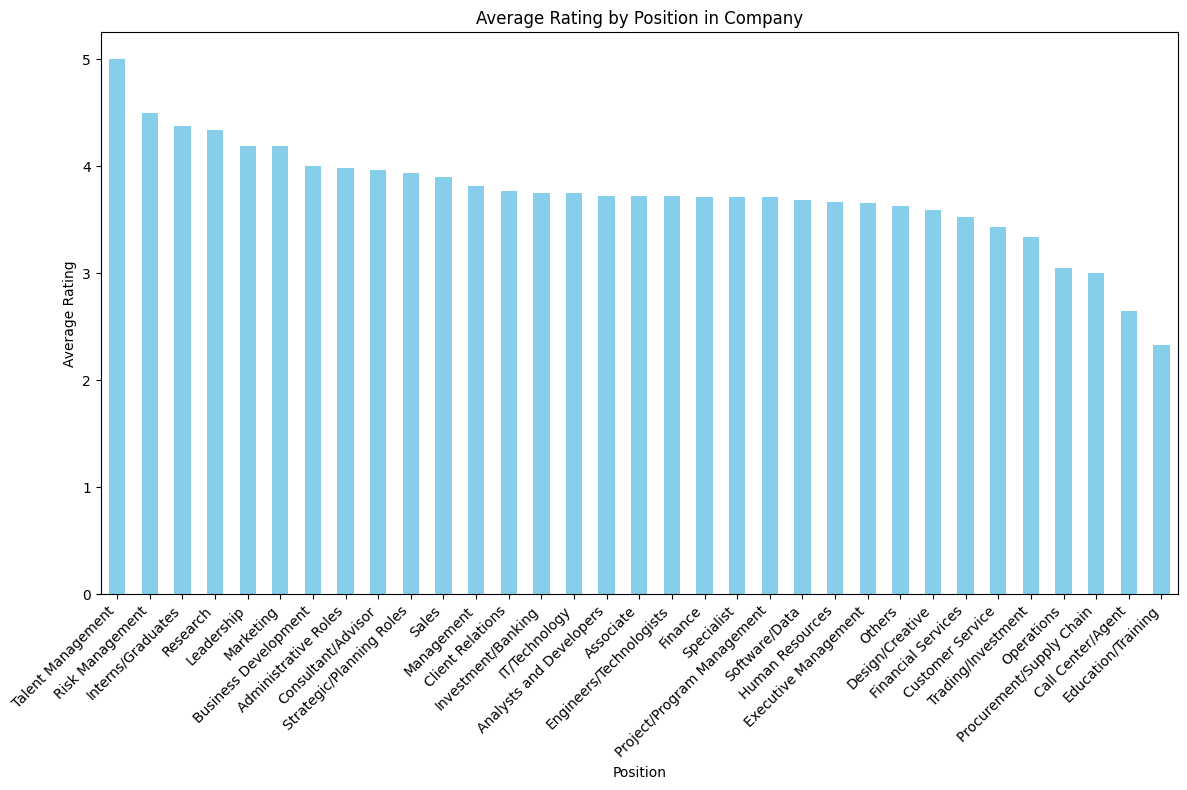

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('general_position')['Rating'].mean()


top_positions = average_ratings_by_position.round(10).sort_values(ascending=False)
print(top_positions)


plt.figure(figsize=(12, 8))
top_positions.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


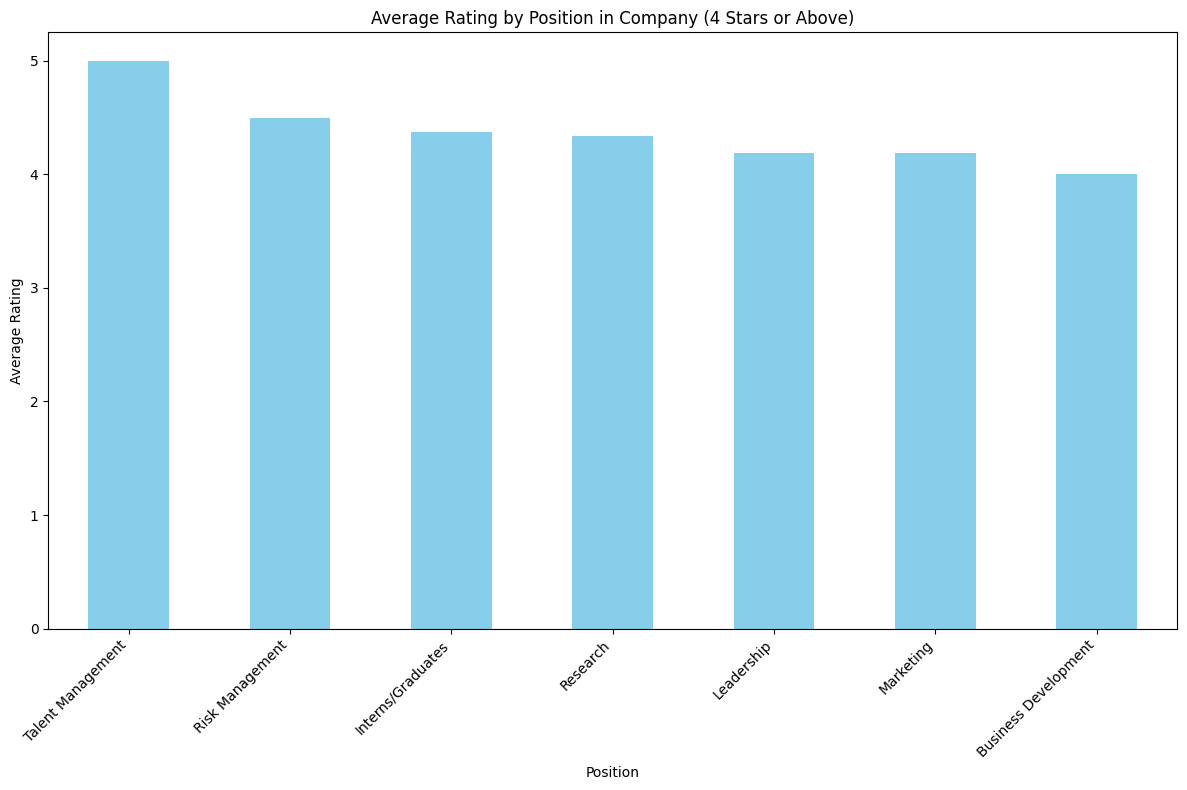

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('general_position')['Rating'].mean()

# Filter out positions with an average rating less than 4
average_ratings_four_or_above = average_ratings_by_position[average_ratings_by_position >= 4].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 4 or above
plt.figure(figsize=(12, 8))
average_ratings_four_or_above.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (4 Stars or Above)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


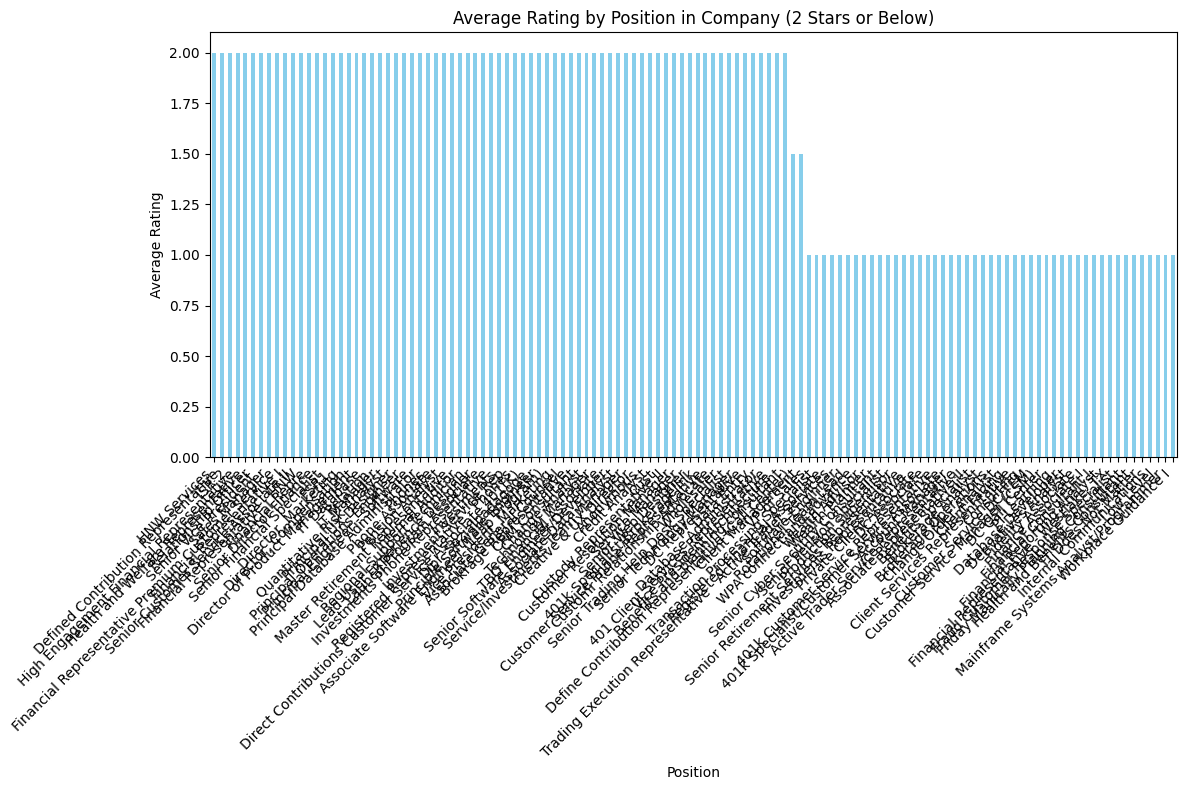

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating greater than 2
average_ratings_below_two = average_ratings_by_position[average_ratings_by_position <= 2].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 2 or below
plt.figure(figsize=(12, 8))
average_ratings_below_two.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (2 Stars or Below)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


Location
Los Lunas, NM           5.0
Pittsburgh, PA          5.0
Santa Fe, NM            5.0
Columbus, OH            5.0
Concord, NC             5.0
                       ... 
Red Bank, NJ            2.0
North Charleston, SC    1.0
Reading, PA             1.0
Lake Worth, TX          1.0
Lone Tree, CO           1.0
Name: Rating, Length: 221, dtype: float64


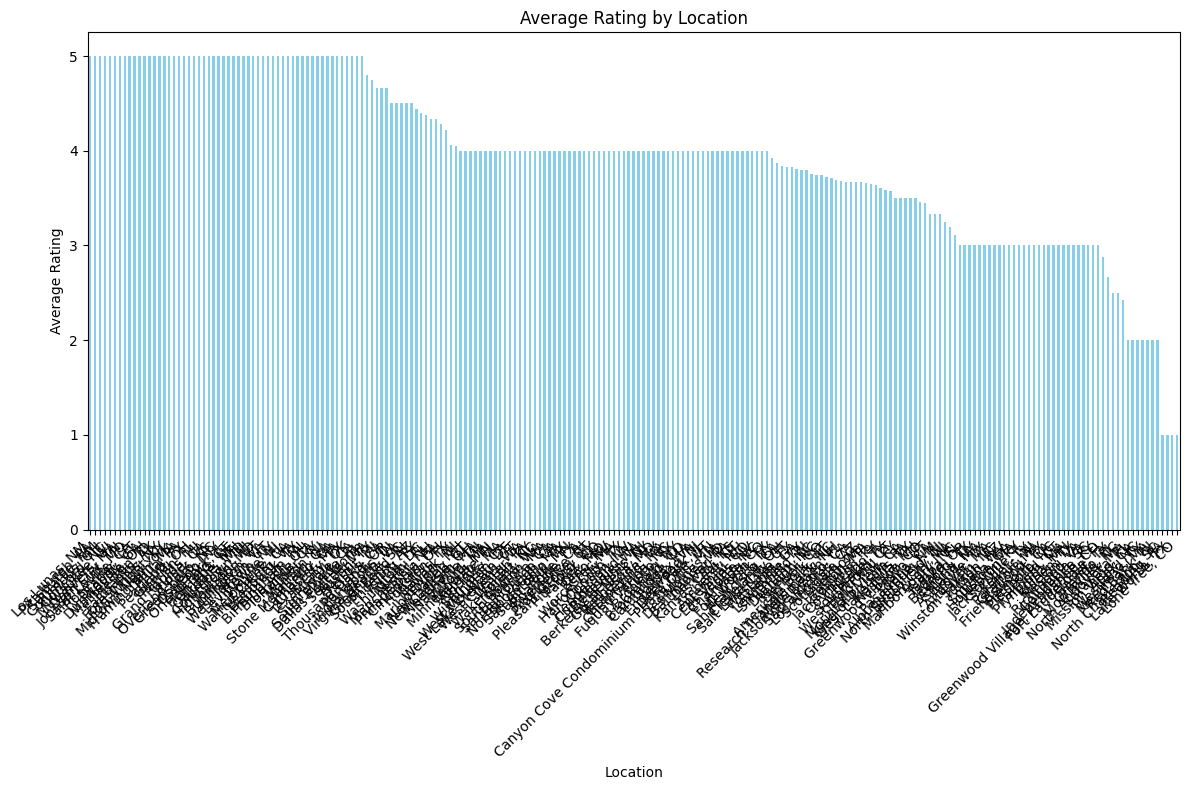

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Location' and calculate the average 'Rating'
average_ratings_by_location = df.groupby('Location')['Rating'].mean()

# Filter out locations with NaN or 0 ratings
average_ratings_by_location_filtered = average_ratings_by_location[average_ratings_by_location > 0]

# Sort the results
average_ratings_by_location_sorted = average_ratings_by_location_filtered.sort_values(ascending=False)

# Display the average ratings by location
print(average_ratings_by_location_sorted)

# Plotting the data
plt.figure(figsize=(12, 8))
average_ratings_by_location_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


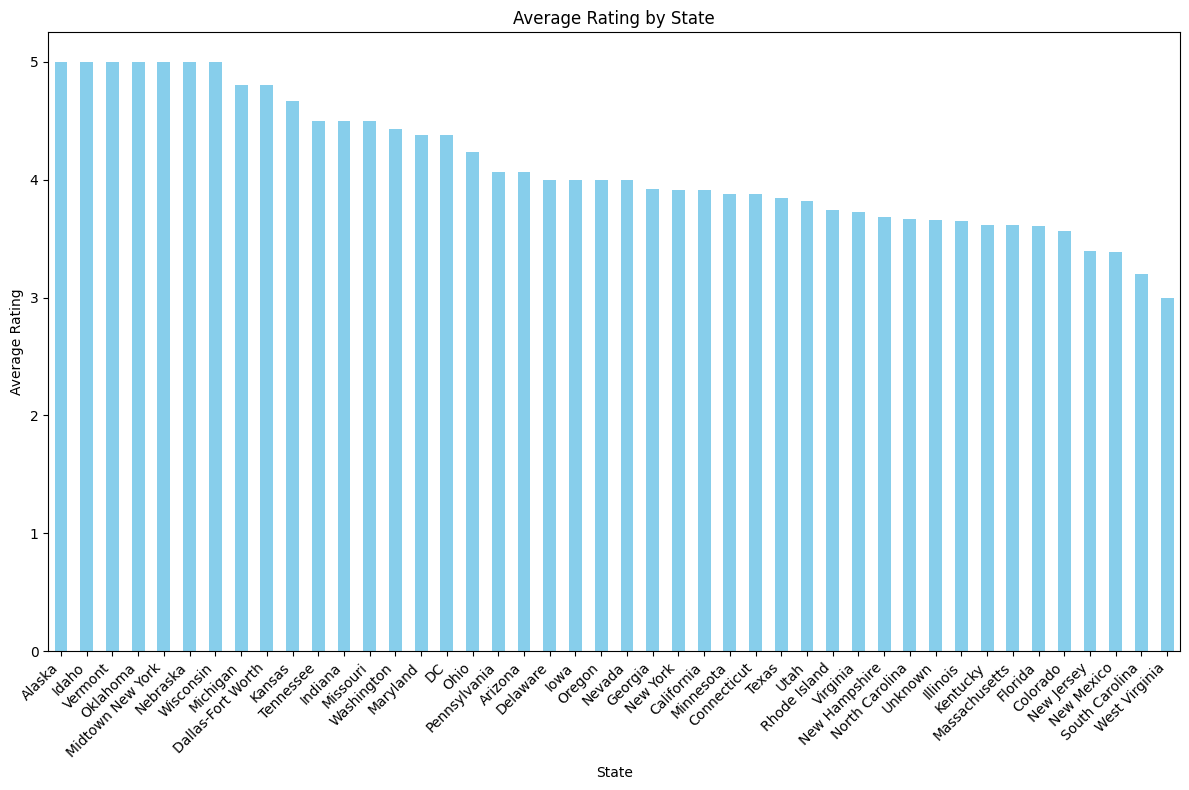

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

 
 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Function to extract state initials
def extract_state(location):
    parts = location.split(', ')
    return parts[-1] if len(parts) > 1 else location

# Extract state initials to a new column
df['location_state'] = df['Location'].apply(extract_state)

# Mapping of state initials to full names
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Replace state initials with full names, retain original if no mapping found
df['location_state'] = df['location_state'].apply(lambda x: state_mapping.get(x, x))

# Group by the new 'location_state' and calculate the average 'Rating'

average_ratings_by_location_state = df.groupby('location_state')['Rating'].mean().sort_values(ascending=False)
average_ratings_by_location_state = average_ratings_by_location_state[average_ratings_by_location_state > 0]

# Optionally, plot this data
plt.figure(figsize=(12, 8))
average_ratings_by_location_state.plot(kind='bar', color='skyblue')
plt.title('Average Rating by State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Highest Average Ratings by Location:
Location
Los Lunas, NM       5.0
Pittsburgh, PA      5.0
Santa Fe, NM        5.0
Columbus, OH        5.0
Concord, NC         5.0
Milwaukee, WI       5.0
Danvers, MA         5.0
Johnson City, TN    5.0
Saint Louis, MO     5.0
Roseville, CA       5.0
Name: Rating, dtype: float64

Top 10 Lowest Average Ratings by Location:
Location
Sarasota, FL            2.0
Mission Viejo, CA       2.0
Apex, NC                2.0
Westland, TX            2.0
Merrimac, MA            2.0
Red Bank, NJ            2.0
North Charleston, SC    1.0
Reading, PA             1.0
Lake Worth, TX          1.0
Lone Tree, CO           1.0
Name: Rating, dtype: float64


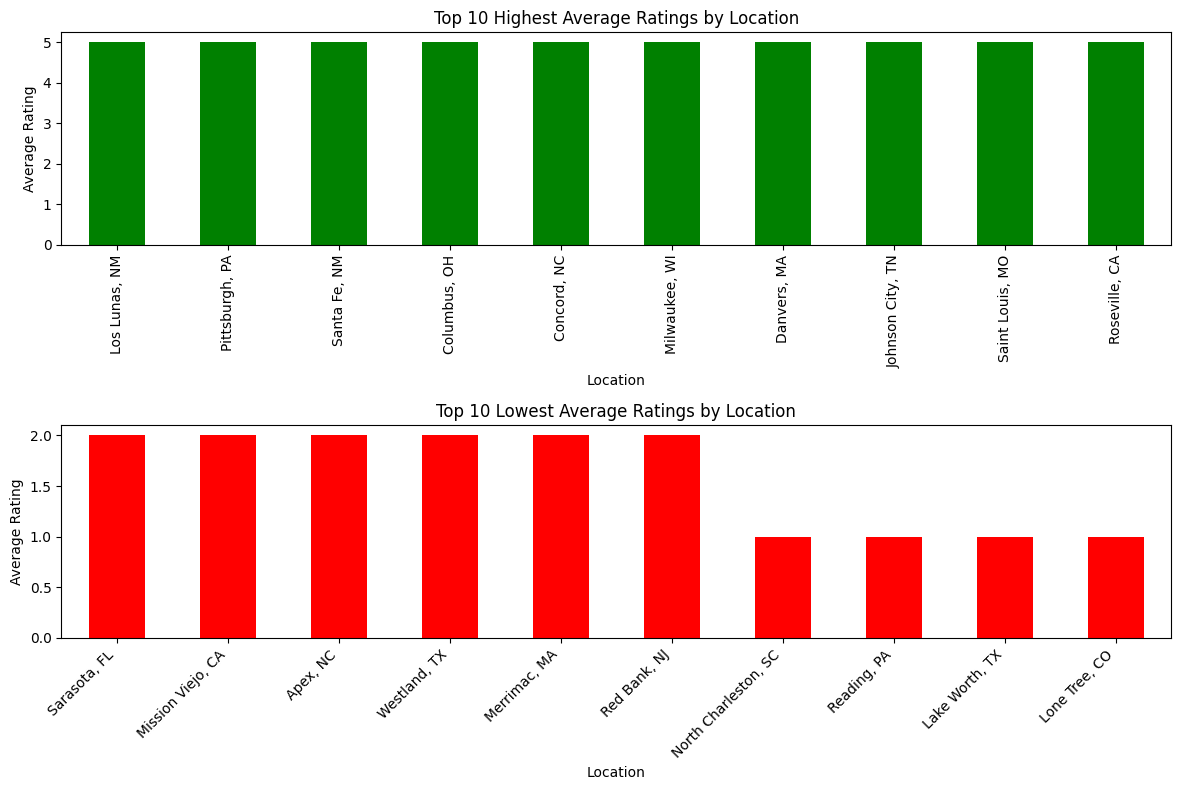

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Location' and calculate the average 'Rating'
average_ratings_by_location = df.groupby('Location')['Rating'].mean()

# Sort the average ratings
average_ratings_by_location_sorted = average_ratings_by_location.sort_values(ascending=False)
average_ratings_by_location_sorted = average_ratings_by_location_sorted[average_ratings_by_location_sorted > 0]

# Get the top 10 highest average ratings
top_10_highest = average_ratings_by_location_sorted.head(10)
print("Top 10 Highest Average Ratings by Location:")
print(top_10_highest)

# Get the top 10 lowest average ratings
top_10_lowest = average_ratings_by_location_sorted.tail(10)
print("\nTop 10 Lowest Average Ratings by Location:")
print(top_10_lowest)

# Plotting for visualization
plt.figure(figsize=(12, 8))

# Plot for top 10 highest average ratings
plt.subplot(2, 1, 1)
top_10_highest.plot(kind='bar', color='green')
plt.title('Top 10 Highest Average Ratings by Location')
plt.ylabel('Average Rating')

# Plot for top 10 lowest average ratings
plt.subplot(2, 1, 2)
top_10_lowest.plot(kind='bar', color='red')
plt.title('Top 10 Lowest Average Ratings by Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from collections import Counter

  
nltk.download('punkt')
nltk.download('stopwords')

   
# Convert 'Title' to string type
df['Title'] = df['Title'].astype(str)

# Function to calculate word frequency for bigrams and trigrams, excluding custom words
def word_frequency_phrases(text):
    custom_stop_words = {'company', 'work', 'place', 'poor', 'good', 'excellent', 'great', 
                         'fantastic', 'superb', 'average', 'mediocre', 'amazing', 'low', 'overall', 'best'}
    stop_words = set(stopwords.words('english')).union(custom_stop_words)
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Generate bigrams and trigrams
    bigrm = list(bigrams(words))
    trigrm = list(trigrams(words))
    
    # Combine bigrams and trigrams
    phrases = [' '.join(bg) for bg in bigrm] + [' '.join(tg) for tg in trigrm]
    return Counter(phrases)

# Group by 'Rating' and calculate most common phrases for each 'Title'
grouped = df.groupby('Rating')['Title'].apply(lambda x: ' '.join(x))
most_common_phrases = grouped.apply(lambda x: word_frequency_phrases(x).most_common(5))

# Display the result in a table
print("Most Popular Phrases in 'Title' for Each Rating:")
print(most_common_phrases)

# For a printed format
for rating, phrases in most_common_phrases.items():
    print(f"\nRating: {rating}")
    for phrase, freq in phrases:
        print(f"{phrase}: {freq}")


[nltk_data] Downloading package punkt to /Users/jeet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Popular Phrases in 'Title' for Each Rating:
Rating
1.0    [(call center, 9), (run away, 4), (financial r...
2.0    [(call center, 14), (financial representative,...
3.0    [(call center, 22), (financial representative,...
4.0    [(call center, 24), (start career, 24), (finan...
5.0    [(fidelity investments, 21), (financial repres...
Name: Title, dtype: object

Rating: 1.0
call center: 9
run away: 4
financial representative: 4
mental health: 3
run far: 3

Rating: 2.0
call center: 14
financial representative: 9
fidelity investments: 8
customer service: 5
customer relationship: 5

Rating: 3.0
call center: 22
financial representative: 21
start career: 14
customer service: 13
high net: 8

Rating: 4.0
call center: 24
start career: 24
financial representative: 21
fidelity investments: 16
long term: 11

Rating: 5.0
fidelity investments: 21
financial representative: 16
culture benefits: 14
start career: 10
build career: 10


In [30]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

# Function to calculate word frequency for bigrams and trigrams, excluding custom words
def word_frequency_phrases(text):
    custom_stop_words = {
        'company', 'work', 'place', 'get', 'cons', 'call', 'calls', 'fidelity', 'think', 'could', 'feel', 'like', 'even', 'though', 'phone', 'phones','call','calls', 'every', 'day'
    }
    stop_words = set(stopwords.words('english')).union(custom_stop_words)
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Generate bigrams and trigrams
    bigrm = list(bigrams(words))
    trigrm = list(trigrams(words))
    
    # Combine bigrams and trigrams, and sort words within phrases to avoid duplicates like "great benefits" and "benefits great"
    phrases = [' '.join(sorted(bg)) for bg in bigrm] + [' '.join(sorted(tg)) for tg in trigrm]
    return Counter(phrases)

# Group by 'Rating' and calculate most common phrases for 'pro' and 'con'
grouped_pro = df.groupby('Rating')['pro'].apply(lambda x: ' '.join(x.astype(str)))
grouped_con = df.groupby('Rating')['con'].apply(lambda x: ' '.join(x.astype(str)))

most_common_phrases_pro = grouped_pro.apply(lambda x: word_frequency_phrases(x).most_common(10))
most_common_phrases_con = grouped_con.apply(lambda x: word_frequency_phrases(x).most_common(10))

# Display the result in a table
print("Most Popular Phrases in 'pro' for Each Rating:")
print(most_common_phrases_pro)
print("\nMost Popular Phrases in 'con' for Each Rating:")
print(most_common_phrases_con)

# For a printed format
print("\nMost Popular Phrases in 'pro':")
for rating, phrases in most_common_phrases_pro.items():
    print(f"\nRating: {rating}")
    for phrase, freq in phrases:
        print(f"{phrase}: {freq}")

print("\nMost Popular Phrases in 'con':")
for rating, phrases in most_common_phrases_con.items():
    print(f"\nRating: {rating}")
    for phrase, freq in phrases:
        print(f"{phrase}: {freq}")


[nltk_data] Downloading package punkt to /Users/jeet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Popular Phrases in 'pro' for Each Rating:
Rating
1.0    [(benefits good, 41), (benefits great, 31), (p...
2.0    [(benefits good, 95), (benefits great, 75), (p...
3.0    [(benefits great, 220), (benefits good, 169), ...
4.0    [(benefits great, 410), (benefits good, 173), ...
5.0    [(benefits great, 308), (culture great, 109), ...
Name: pro, dtype: object

Most Popular Phrases in 'con' for Each Rating:
Rating
1.0    [(management upper, 20), (low pay, 18), (cente...
2.0    [(management senior, 20), (customer service, 1...
3.0    [(management upper, 38), (low pay, 32), (balan...
4.0    [(management upper, 36), (low pay, 32), (busin...
5.0    [(base pay, 35), (entry level, 16), (hours lon...
Name: con, dtype: object

Most Popular Phrases in 'pro':

Rating: 1.0
benefits good: 41
benefits great: 31
profit sharing: 21
benefits pay: 11
decent pay: 11
good pay: 10
benefits decent: 9
benefits health: 8
beautiful campus: 8
coffee free: 8

Rating: 2.0
benefits good: 95
benefits great: 75
pr

In [16]:
import pandas as pd

# Assuming your DataFrame is named df and it has columns 'Rating' and 'helpfulness'
# Make sure 'helpfulness' is a numeric column
df['helpfulness'] = pd.to_numeric(df['helpfulness'], errors='coerce')

# Group by 'Rating' and calculate the average 'helpfulness'
average_helpfulness_by_rating = df.groupby('Rating')['helpfulness'].mean()

# Display the result
print("Average Helpfulness for Each Rating:")
print(average_helpfulness_by_rating)


Average Helpfulness for Each Rating:
Rating
1.0    8.607477
2.0    3.843458
3.0    2.845902
4.0    2.326400
5.0    3.022222
Name: helpfulness, dtype: float64


In [17]:
import pandas as pd

# Assuming your DataFrame is named df and it has columns 'Status' and 'Rating'
# Make sure 'Rating' is a numeric column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Status' and calculate the average 'Rating'
average_rating_by_status = df.groupby('Status')['Rating'].mean()

# Display the result
print("Average Rating for Each Status:")
print(average_rating_by_status)


Average Rating for Each Status:
Status
Current Employee                        3.784047
Current Employee, less than 1 year      4.150794
Current Employee, more than 1 year      4.035413
Current Employee, more than 10 years    3.934307
Current Employee, more than 3 years     3.834688
Current Employee, more than 5 years     3.924731
Current Employee, more than 8 years     4.023622
Former Employee                         3.404317
Former Employee, less than 1 year       3.545064
Former Employee, more than 1 year       3.063063
Former Employee, more than 10 years     3.711864
Former Employee, more than 3 years      3.300000
Former Employee, more than 5 years      3.321244
Former Employee, more than 8 years      3.495935
Name: Rating, dtype: float64


In [18]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your data is loaded into a DataFrame called df
# Convert 'Rating' to a numeric type and filter rows with rating 3 or below
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
filtered_df = df[df['Rating'] <= 3]

# Convert 'con' to string type
filtered_df['con'] = filtered_df['con'].astype(str)

# Extend the stopwords list with your custom words
custom_stop_words = {'like', 'even', 'people', 'get', 'fidelity'}
stop_words = set(stopwords.words('english')).union(custom_stop_words)

def word_frequency(text_column):
    words = word_tokenize(' '.join(text_column).lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(filtered_words)

# Counting word frequency in 'con'
con_freq = word_frequency(filtered_df['con'])

# Displaying the most common words in 'con' for ratings 3 or below, excluding custom stop words
print("Most common words in 'con' for ratings 3 or below (excluding certain words):")
for word, count in con_freq.most_common(10):
    print(f"{word}: {count}")


[nltk_data] Downloading package punkt to /Users/jeet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/f6/tr_gxbkd2510_wbt4rl50ndh0000gn/T/ipykernel_81269/577463723.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['con'] = filtered_df['con'].astype(str)


Most common words in 'con' for ratings 3 or below (excluding certain words):
management: 698
work: 686
company: 653
job: 513
pay: 417
call: 404
employees: 393
time: 378
managers: 332
many: 301
